In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import math
# from scipy.misc import imsave
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
def my_f_and(l1,l2):
    n=len(l1)
    s=[]
    for i in range(n):
        a=l1[i] and l2[i]
        s.append(a)
    return s
# def my_f1_and(l1):
#     if 0 in l1:
#         s1=0
#     else:
#         s1=1
#     return s1
def my_f1_AND_or_OR(l1,operator=0):
    if operator :
        if 1 in l1:
            s1=1
        else:
            s1=0
    else:
        if 0 in l1:
            s1=0
        else:
            s1=1       
    return s1

def my_f2_combine(l1,l2,op=0):
    a=my_f_and(l1,l2)
    return my_f1_AND_or_OR(a,op)

In [4]:
list1=[0,0,1,0,1] #mask
list2=[1,1,1,1,1] #block
imgOR=(list1[0] and list2[0]) or (list1[1] and list2[1]) or (list1[2] and list2[2])
imgOR

1

In [6]:
a=my_f_and(list1,list2)
a

[0, 0, 1, 0, 1]

In [7]:
my_f2_combine(list1,list2,0)

0

In [8]:
def convert_RGB_to_monochrome_BW(image1,threshold=100):
    img1=image1 #plt.imread(image1)
    img2=np.zeros((img1.shape[0],img1.shape[1]))
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            if(img1[i,j,0]/3+img1[i,j,1]/3+img1[i,j,1]/3)>threshold:
                img2[i,j]=0
            else:
                img2[i,j]=1
    return img2

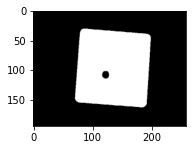

In [18]:
filepath=u"C:\\Users\\arzut\\OneDrive\\Masaüstü\\arkaplan\\images.png"
img1=plt.imread(filepath)

img2=convert_RGB_to_monochrome_BW(img1,0.5)

plt.subplot(1,2,1),plt.imshow(img1,cmap='gray')

#plt.imshow(img1)
plt.show()

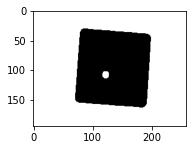

In [19]:
plt.subplot(1,2,2),plt.imshow(img2,cmap='gray')
plt.show()

In [20]:
img1.shape
np.max(img1)

1.0

In [21]:
def define_mask1():
    mask1=[[1,1,1],[1,1,1],[1,1,1]]
    # mask,mask[1][2],mask[0][0],mask[2][2]
    # for i in range(3):
    #     for j in range(3):
    #         print(mask[i][j],end=" ")
    #     print()
    return mask1

def define_mask2():
    mask1=[[0,0,0],[0,0,0],[0,0,0]]
    #mask,mask[1][2],mask[0][0],mask[2][2]
    #for i in range(3):
    #    for j in range(3):
    #        print(mask[i][j],end=" ")
    #    print()
    return mask1

In [22]:
def my_dilation(img1,mask):
    m=img1.shape[0] #100
    n=img1.shape[1] #100
    #img2=np.random.randint(0,1,(m,n))
    img2=np.zeros((m,n),dtype='uint8')
    for i in range(1,m-1): #padding
        for j in range(1,n-1):
            # x1=img1[i,j] or mask[1][1]
            # 
            # x2=img1[i-1,j-1] or mask[0][0]
            # x3=img1[i-1,j] or mask[0][1]
            # x4=img1[i-1,j+1] or mask[0][2]
            # 
            # x5=img1[i+1,j-1] or mask[2][0]
            # x6=img1[i+1,j] or mask[2][1]
            # x7=img1[i+1,j+1] or mask[2][2]
            # 
            # x8=img1[i,j-1] or mask[1][0]
            # x9=img1[i,j+1] or mask[1][2]
            
            x1=img1[i,j] == mask[1][1]
            
            x2=img1[i-1,j-1] == mask[0][0]
            x3=img1[i-1,j] == mask[0][1]
            x4=img1[i-1,j+1] == mask[0][2]
            
            x5=img1[i+1,j-1] == mask[2][0]
            x6=img1[i+1,j] == mask[2][1]
            x7=img1[i+1,j+1] == mask[2][2]
            
            x8=img1[i,j-1] == mask[1][0]
            x9=img1[i,j+1] == mask[1][2]
            
            r1=x1 or x2 or x3 or x4 or x5
            r2=x6 or x7 or x8 or x9
            
            r=r1 or r2 
            
            img2[i,j]=r
    return img2


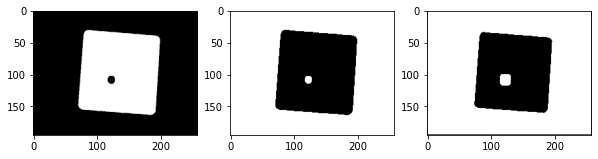

In [23]:
img3=my_dilation(img2,define_mask1())
img4=my_dilation(img3,define_mask1())
img5=my_dilation(img4,define_mask1())

plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(img1)
plt.subplot(1,3,2),plt.imshow(img2,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img5,cmap='gray')
plt.show()